## 17. MOSFETs-The Essentials
### 17.1 Qualitative Theory of operation
### 17.2 Quantitative ID-VD Relationships
### 17.2.1 Preliminary Considerations
#### Threshold Voltage
NMOS, p-bulk
$$V_T=2\phi_F+\frac{Ks x_o}{Ko}\sqrt{\frac{4qN_A}{Ks\epsilon_0}\phi_F} $$
PMOS, n-bulk
$$V_T=2\phi_F-\frac{Ks x_o}{Ko}\sqrt{\frac{4qN_D}{Ks\epsilon_0}(-\phi_F)} $$
#### Effective Mobility
mu_0=847, theta=0.0446V, mu_bulk=1340cm2/V-sec
$$\overline{\mu}_n=\frac{\mu_0}{1+\theta(V_G-V_T)} $$


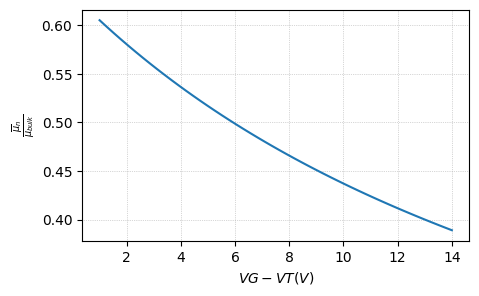

In [39]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt
VGT=np.linspace(1,14)
mu_inv=847/(1+0.0446*VGT)/1340

plt.figure(figsize=(5,3))
plt.plot(VGT,mu_inv)
plt.xlabel(r"$VG-VT(V)$"), plt.ylabel(r"$\frac{\overline{\mu}_n}{\mu_{bulk}}$")
plt.grid(True, which='both', linestyle=':', linewidth=0.5)

### 17.2.2 Square-Law Theory
$$C_o=\frac{C_o}{A_G}=\frac{K_o\epsilon_0}{x_o} $$
$$I_D=\frac{Z\overline{\mu}_nC_o}{L}\left[(V_G-V_T)V_D-\frac{V_D^2}{2} \right] \quad 0\le V_D\le V_Dsat, \ V_G \ge V_T$$
$$V_Dsat=V_G-V_T $$
$$I_Dsat=\frac{Z\overline{\mu}_nC_o}{2L}(V_G-V_T)^2 $$
Drain current varies as the square of the gate voltage above turn-on, the so-called "square-law" dependence.

#### Exercise 17.2

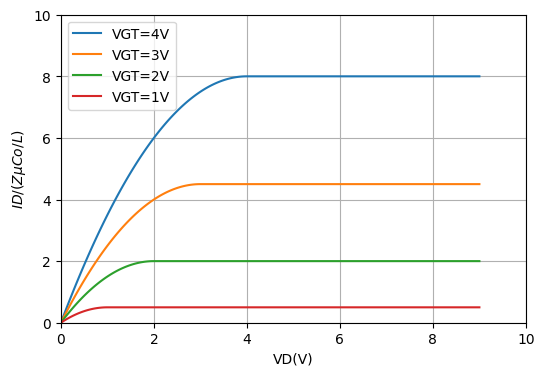

In [46]:
# Exercise 17.2 page 624
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

VGT=[4,3,2,1]

plt.figure(figsize=(6,4))
for i in range(len(VGT)):
    VD=np.linspace(0,VGT[i],101)
    ID=VGT[i]*VD-VD**2/2
    IDsat=VGT[i]**2/2
    VD=np.hstack((VD,9))
    ID=np.hstack((ID,IDsat))
    plt.plot(VD,ID,label=f'VGT={VGT[i]}V')

plt.xlabel("VD(V)"), plt.ylabel("ID(A)")
plt.xlim(0,10), plt.ylim(0,10), plt.xlabel("VD(V)"), plt.ylabel(r"$ID/(Z\mu Co/L)$")
plt.legend(), plt.grid()
plt.show()

### 17.2.3 Bulk-Charge Theory(Depletion Approximation)

phif=0.298V, WT=8.773e-05cm, Co=3.453e-08pF, VW=0.407V


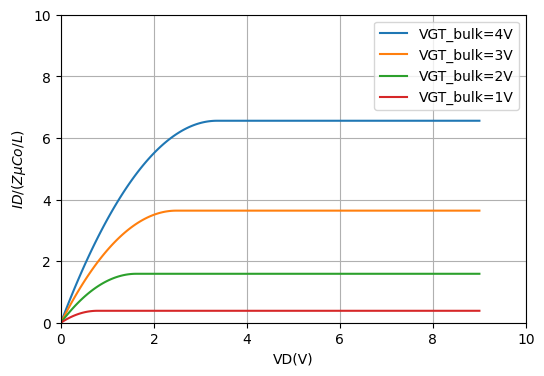

In [1]:
# Problem 17.15 page 640
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300; kT=k*T; ni=ni(T); Ks=e_si; Ko=e_ox; NA=1e15; xo=0.1e-4

phif=kT*np.log(NA/ni)
WT=np.sqrt(2*Ks*e0/(q*NA)*(2*phif))
Co=Ko*e0/xo
VW=q*NA*WT/Co
print('phif=%0.3fV, WT=%0.3ecm, Co=%0.3epF, VW=%0.3fV' % (phif,WT,Co,VW))

VGT=[4,3,2,1]

plt.figure(figsize=(6,4))
for i in range(len(VGT)):
    VDsat_bulk=VGT[i]-VW*((VGT[i]/(2*phif)+(1+VW/(4*phif))**2)**0.5-(1+VW/(4*phif)))
    VD=np.linspace(0,VDsat_bulk,101)

    IDb=VGT[i]*VD-VD**2/2-(4/3)*VW*phif*((1+VD/(2*phif))**1.5-(1+3*VD/(4*phif)))
    IDsat_bulk=(VGT[i]*VDsat_bulk-VDsat_bulk**2/2 - 4/3*VW*phif*((1+VDsat_bulk/(2*phif))**1.5-(1+1.5*VDsat_bulk/(2*phif))))

    VD=np.hstack((VD,9))
    ID_bulk=np.hstack((IDb,IDsat_bulk))
    plt.plot(VD,ID_bulk,label=f'VGT_bulk={VGT[i]}V')

#plt.xlabel("VD(V)"), plt.ylabel("ID(A)")
plt.xlim(0,10), plt.ylim(0,10), plt.xlabel("VD(V)"), plt.ylabel(r"$ID/(Z\mu Co/L)$")
plt.legend(), plt.grid()
plt.show()

In [21]:
# Exercise 17.3 page 617, bulk-charge theory, Id?
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

xo=0.05e-4; NA=1e16; ZL=10; T=300; mun_inv=625; kT=k*T; ni=ni(T); Ks=e_si; Ko=e_ox

phif=kT*np.log(NA/ni)
WT=np.sqrt(2*Ks*e0/(q*NA)*(2*phif))
Co=Ko*e0/xo
VW=q*NA*WT/Co
VT=2*phif+Ks/Ko*xo*np.sqrt(4*q*NA/(Ks*e0)*phif)
print('phif=%0.3fV, WT=%0.3ecm, Co=%0.3epF, VW=%0.3fV, VT=%0.3fV' % (phif,WT,Co,VW,VT))

VG=3
VD=3
VGT=VG-VT
VDsat=VGT-VW*((VGT/(2*phif)+(1+VW/(4*phif))**2)**0.5-(1+VW/(4*phif)))
print(VGT, VDsat)

# VG=VD=3V > VG-VT=VGT=1.58V > VDsat=1.14V, so saturated region
IDsat1=VGT*VDsat-VDsat**2/2
IDsat2=(4/3*VW*phif*((1+VDsat/(2*phif))**1.5-(1+1.5*VDsat/(2*phif))))
IDb_sat=IDsat1-IDsat2
IDatVGVD3V=ZL*mun_inv*Co*IDb_sat
print(IDatVGVD3V)

#If linear region, wrong solution
IDb=VGT*VD-VD**2/2-(4/3)*VW*phif*((1+VD/(2*phif))**1.5-(1+3*VD/(4*phif)))
print(IDb)

phif=0.357V, WT=3.039e-05cm, Co=6.906e-08pF, VW=0.705V, VT=1.419V
1.5806738863754122 1.1474452469297567
0.0003830369620291981
-1.2882692310372756


### 17.2.4 Charge-Sheet and Exact-Charge Theories

### 17.3 a.c. Response
### 17.3.1 Small-Signal Equivalent Circuits
### 17.3.2 Cutoff Frequency
### 17.3.3 Small-Signal Chracteristics

drain or channel conductance
$$g_d\equiv \left.\frac{\partial I_D}{\partial V_D} \right|_{V_{G=constant}} $$ 
transconductance or mutual conductance
$$g_m\equiv \left.\frac{\partial I_D}{\partial V_G} \right|_{V_{D=constant}} $$ 



### 17.4 Summary

In [41]:
# Problem 17.2 page 639 sample calculations
# T=3ooK, nMOS, Z=50u, L=5u, xo=0.05u, NA=1e15/cm3, mu_inv=800cm2/V-sec
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300; Z=50e-4; L=5e-4; xo=0.05e-4; NA=1e15; mu_inv=800
kT=k*T; ni=ni(T); Ks=e_si; Ko=e_ox

phif=kT*np.log(NA/ni)
VT=2*phif+Ks*xo/Ko*np.sqrt(4*q*NA/(Ks*e0)*phif)
Co=Ko*e0/xo
Vg=2
#Idsat(square-law theory) if Vg=2V, VDsat_square=Vg-VT
VDsat_square=Vg-VT
IDsat_square=Z*mu_inv*Co/(2*L)*(Vg-VT)**2
gd_square=Z*mu_inv*Co/L*(Vg-VT)
gm_square=Z*mu_inv*Co/L*(Vg-VT)
print("phif=%0.03fV, VT=%0.03fV, Co=%0.3eF, VDsat_square=%0.3fV, IDsat_square=%0.3eA" % (phif,VT,Co,VDsat_square,IDsat_square))
print("gd_square=%0.03eS, gm_square=%0.03eS" % (gd_square,gm_square))

#Idsat(bulk-charge theory) if Vg=2V,
WT=np.sqrt(2*Ks*e0/(q*NA)*(2*phif))
VW=q*NA*WT/Co
VGT=Vg-VT
VDsat_bulk=VGT-VW*((VGT/(2*phif)+(1+VW/(4*phif))**2)**0.5-(1+VW/(4*phif)))
IDsat_bulk=Z/L*mu_inv*Co*(VGT*VDsat-VDsat**2/2 - 4/3*VW*phif*((1+VDsat/(2*phif))**1.5-(1+1.5*VDsat_bulk/(2*phif))))
gd_bulk=Z*mu_inv*Co/L*(Vg-VT)
gm_bulk=Z*mu_inv*Co/L*VDsat_bulk
VD=1
fmax=mu_inv*VD/(2*np.pi*L**2)
print("WT=%0.03ecm, VW=%0.3fV, VDsat_bulk=%0.3fV, Idsat_bulk=%0.3eA" % (WT,VW,VDsat_bulk,IDsat_bulk))
print("gd_bulk=%0.03eS, gm_bulk=%0.03eS, fmax=%0.3eHz" % (gd_bulk,gm_bulk,fmax))

phif=0.298V, VT=0.799V, Co=6.906e-08F, VDsat_square=1.201V, IDsat_square=3.986e-04A
gd_square=6.637e-04S, gm_square=6.637e-04S
WT=8.773e-05cm, VW=0.204V, VDsat_bulk=1.065V, Idsat_bulk=3.500e-04A
gd_bulk=6.637e-04S, gm_bulk=5.883e-04S, fmax=5.093e+08Hz


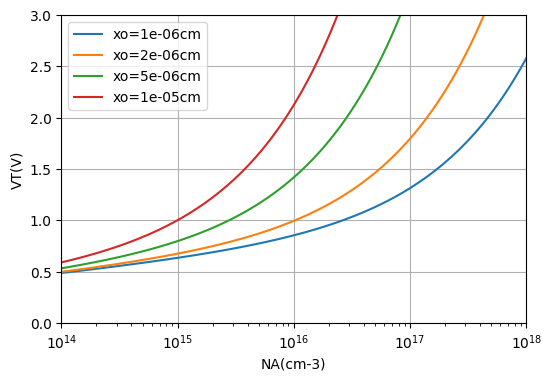

In [7]:
# Problem 17.4 plot of VT vs NA for ideal nMOS at Room Temp
# x=0.01, 0.02, 0.05, 0.1um, NA 1e14 ~ 1e18, VT 0 ~ 3V
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

xo=[0.01e-4, 0.02e-4, 0.05e-4, 0.1e-4]
T=300; Ks=e_si; Ko=e_ox
kT=k*T; ni=ni(T)

plt.figure(figsize=(6,4))
for i in range(len(xo)):
    NA=np.logspace(14,18,101)
    phif=kT*np.log(NA/ni)
    VT=2*phif+Ks*xo[i]/Ko*np.sqrt(4*q*NA/(Ks*e0)*phif)
    plt.semilogx(NA,VT,label=f'xo={xo[i]}cm')

plt.xlabel("NA(cm-3)"), plt.ylabel("VT(V)"), plt.xlim(1e14,1e18), plt.ylim(0,3)
plt.legend(), plt.grid()
plt.show()

In [8]:
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni
import numpy as np, matplotlib.pyplot as plt
T=375
ni=np.sqrt(Nc(T)*Nv(T))*np.exp(-(Eg(T)-0.00743)/(2*k*T))
print("%.3e"%ni)

1.518e+12


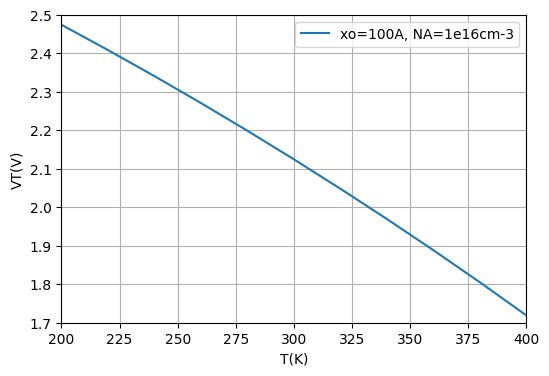

In [20]:
# Problem 17.5 temperature dependence of the threshold voltage in an ideal nMOS
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=np.linspace(200,400,11)
Ks=e_si; Ko=e_ox
kT=k*T; ni=ni(T)

xo=0.1e-4; NA=1e16

# VT computation
plt.figure(figsize=(6,4))
for i in range(len(T)):
    phif=kT*np.log(NA/ni)
    VT=2*phif+Ks*xo/Ko*np.sqrt(4*q*NA/(Ks*e0)*phif)
    
plt.plot(T, VT, label="xo=100A, NA=1e16cm-3")
plt.xlabel("T(K)"), plt.ylabel("VT(V)"), plt.xlim(200,400), plt.ylim(1.7,2.5)
plt.legend(), plt.grid()
plt.show()

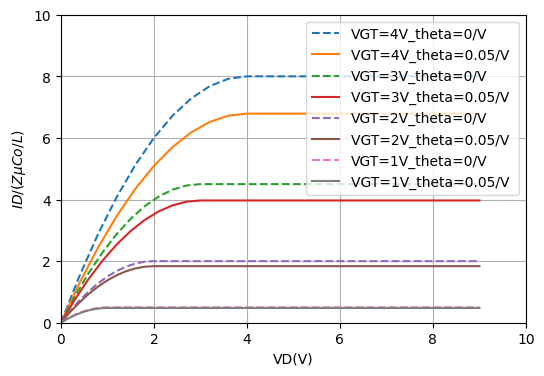

In [40]:
# Problem 17.8 page 640, square-law theory, mobility on VG theta-0, 0.05
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

VGT=[4,3,2,1]

plt.figure(figsize=(6,4))
for i in range(len(VGT)):
    
    VD=np.linspace(0,VGT[i],11)
    ID=VGT[i]*VD-VD**2/2
    IDsat=VGT[i]**2/2
    
    VD=np.hstack((VD,9))
    ID=np.hstack((ID,IDsat))
    #mu_inv1=847/(1+0*VGT)/1340
    #mu_inv2=847/(1+0.0446*VGT[i])/1340
    mu_inv2=1/(1+0.0446*VGT[i])
    plt.plot(VD,ID,"--", label=f'VGT={VGT[i]}V_theta=0/V')
    plt.plot(VD,ID*mu_inv2,label=f'VGT={VGT[i]}V_theta=0.05/V ')

plt.xlabel("VD(V)"), plt.ylabel("ID(A)")
plt.xlim(0,10), plt.ylim(0,10), plt.xlabel("VD(V)"), plt.ylabel(r"$ID/(Z\mu Co/L)$")
plt.legend(loc='upper right'), plt.grid()
plt.show()

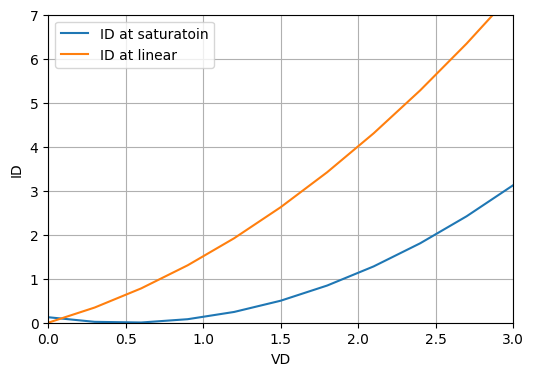

In [51]:
# Problem 17.9 page 640, square-law theory
# Vg=Vd+Vbattery, Vd=Vg-Vbattery
# Vb=VT/2, Vdsat=Vg-VT, so Vd=Vg-VT/2 > Vdsat, always biased into saturation
# Vb=2VT, then Vd=Vg-2VT < Vg-VT = Vdsat, always biased in the linear region of operation
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

Z=1; mu_inv=1; Co=1; L=1; VT=1
VD=np.linspace(0, 3, 11)
ID1=Z*mu_inv*Co/(2*L)*(VD-VT/2)**2 #ID=0 if VD < VT/2
ID2=Z*mu_inv*Co/(2*L)*((VD+VT)**2-VT**2)

plt.figure(figsize=(6,4))
plt.plot(VD,ID1,label="ID at saturatoin")
plt.plot(VD,ID2,label="ID at linear")
plt.xlabel("VD"), plt.ylabel("ID"), plt.xlim(0,3), plt.ylim(0,7)
plt.legend(), plt.grid()
plt.show()
 

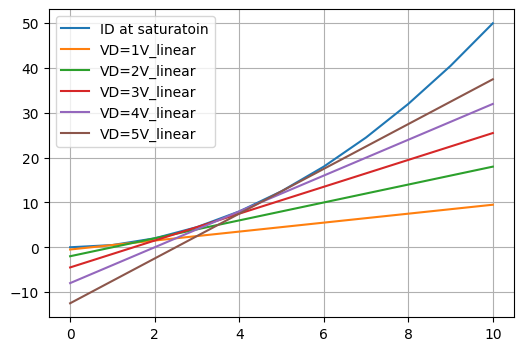

In [67]:
# Problem 17.10 page 641, square-law theory
# Vg=Vd+Vbattery, Vd=Vg-Vbattery
# Vb=VT/2, Vdsat=Vg-VT, so Vd=Vg-VT/2 > Vdsat, always biased into saturation
# Vb=2VT, then Vd=Vg-2VT < Vg-VT = Vdsat, always biased in the linear region of operation
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

Z=1; mu_inv=1; Co=1; L=1; VT=1
VD=[1,2,3,4,5]
VGT=np.linspace(0, 10, 11)
ID1=Z*mu_inv*Co/(2*L)*(VGT)**2

plt.figure(figsize=(6,4))
plt.plot(VGT,ID1,label='ID at saturatoin')
for i in range(len(VD)):
    ID2=Z*mu_inv*Co/L*(VGT*VD[i]-(VD[i]**2)/2)
    plt.plot(VGT,ID2,label=f'VD={VD[i]}V_linear')
    
plt.xlabel("VG-VT(V)"), plt.ylabel("ID"), plt.xlim(0,3), plt.ylim(0,50)
plt.legend(), plt.grid()
plt.show()

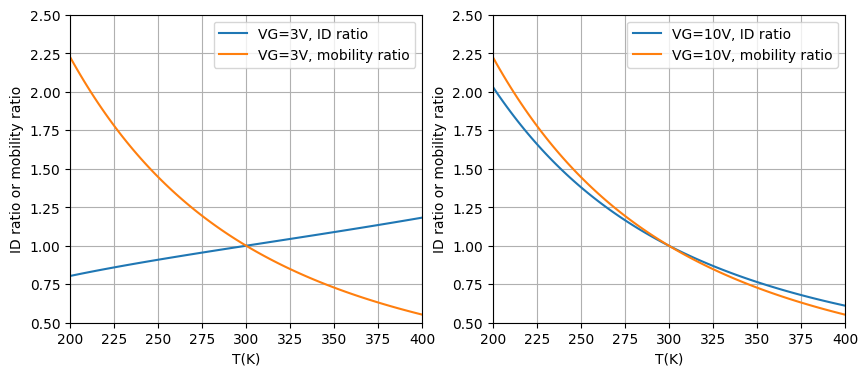

In [103]:
# Problem 17.12 square-law, ID and mobility ration according to gate voltage
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

Ks=e_si; Ko=e_ox; xo=0.1e-4; NA=1e16
T=np.linspace(200,400,101)
kT=k*T; ni=ni(T); mun=mun(T)
munratio=mun/mun[50] #mun[50] at 300K

phif=kT*np.log(NA/ni)
VT=2*phif+Ks*xo/Ko*np.sqrt(4*q*NA/(Ks*e0)*phif)

VG=3; IDratio1=munratio*((VG-VT)/(VG-VT[50]))**2
VG=10; IDratio2=munratio*((VG-VT)/(VG-VT[50]))**2

plt.figure(figsize=(10,4))
plt.subplot(121)
plt.plot(T,IDratio1, label="VG=3V, ID ratio")
plt.plot(T, munratio, label="VG=3V, mobility ratio")
plt.xlabel("T(K)"), plt.ylabel("ID ratio or mobility ratio"), plt.xlim(200,400), plt.ylim(0.5,2.5)
plt.legend(), plt.grid()

plt.subplot(122)
plt.plot(T,IDratio2, label="VG=10V, ID ratio")
plt.plot(T, munratio, label="VG=10V, mobility ratio")
plt.xlabel("T(K)"), plt.ylabel("ID ratio or mobility ratio"), plt.xlim(200,400), plt.ylim(0.5,2.5)
plt.legend(), plt.grid()
plt.show()

phif=0.298V, WT=8.773e-05cm, Co=3.453e-08pF, VW=0.407V


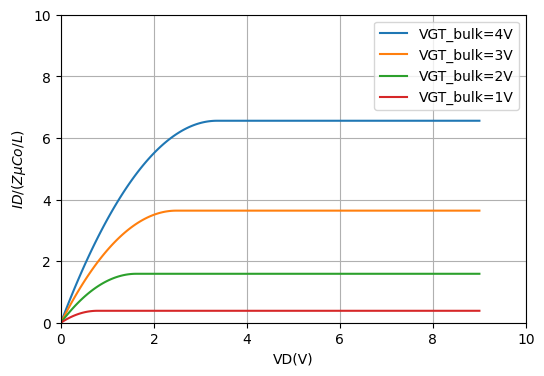

In [104]:
# Problem 17.15 page 640
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

T=300; kT=k*T; ni=ni(T); Ks=e_si; Ko=e_ox; NA=1e15; xo=0.1e-4

phif=kT*np.log(NA/ni)
WT=np.sqrt(2*Ks*e0/(q*NA)*(2*phif))
Co=Ko*e0/xo
VW=q*NA*WT/Co
print('phif=%0.3fV, WT=%0.3ecm, Co=%0.3epF, VW=%0.3fV' % (phif,WT,Co,VW))

VGT=[4,3,2,1]

plt.figure(figsize=(6,4))
for i in range(len(VGT)):
    VDsat_bulk=VGT[i]-VW*((VGT[i]/(2*phif)+(1+VW/(4*phif))**2)**0.5-(1+VW/(4*phif)))
    VD=np.linspace(0,VDsat_bulk,101)

    IDb=VGT[i]*VD-VD**2/2-(4/3)*VW*phif*((1+VD/(2*phif))**1.5-(1+3*VD/(4*phif)))
    IDsat_bulk=(VGT[i]*VDsat_bulk-VDsat_bulk**2/2 - 4/3*VW*phif*((1+VDsat_bulk/(2*phif))**1.5-(1+1.5*VDsat_bulk/(2*phif))))

    VD=np.hstack((VD,9))
    ID_bulk=np.hstack((IDb,IDsat_bulk))
    plt.plot(VD,ID_bulk,label=f'VGT_bulk={VGT[i]}V')

plt.xlabel("VD(V)"), plt.ylabel("ID(A)")
plt.xlim(0,10), plt.ylim(0,10), plt.xlabel("VD(V)"), plt.ylabel(r"$ID/(Z\mu Co/L)$")
plt.legend(), plt.grid()
plt.show()

In [108]:
# Problem 17.18, page 642
# Vg=3V, Vd=0V, nMOS, Z=70u, L=7u, mu_avg=550cm2/V, x=500A, VT=1V
# QN inversion layer charge/cm2 at the midpoint(y=L/2) of the channel
# drain conductance(gd) at the specified bias point
from constant import q,m0,e0,hbar,mn,e_si,k,kB,mp,kT_q,Eg,Nc,Nv,ni,mun,mup,e_ox
import numpy as np, matplotlib.pyplot as plt

ko=e_ox; xo=0.05e-4; VG=3; VT=1
Z=701e-4; L=7e-4; mu_avg=550
Co=Ko*e0/xo
QN=-Co*(VG-VT)
gdVD0=Z*mu_avg*QN/L
print('Co=%0.3eF, QN=%0.3eC/cm2, gdVD0=%0.3eS' % (Co,QN,gdVD0))

Co=6.906e-08F, QN=-1.381e-07C/cm2, gdVD0=-7.608e-03S
